In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'C:\Users\irina\Downloads\facebook_ads_data.csv')
df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


Графік з щоденною сумою витрат на рекламу в 2021 році;


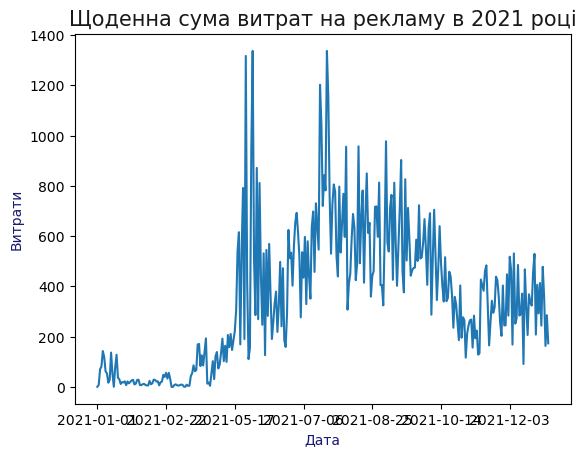

In [2]:
df_d = df.groupby('ad_date', as_index=True)[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
df_d.loc['2021-01-01':'2021-12-31'].plot(y='total_spend')
plt.title('Щоденна сума витрат на рекламу в 2021 році',size = 15, color = 'Black', alpha = 0.9)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Витрати',color='midnightblue')
plt.legend().remove()
plt.show()

Графік з щоденним ROMI в 2021 році.

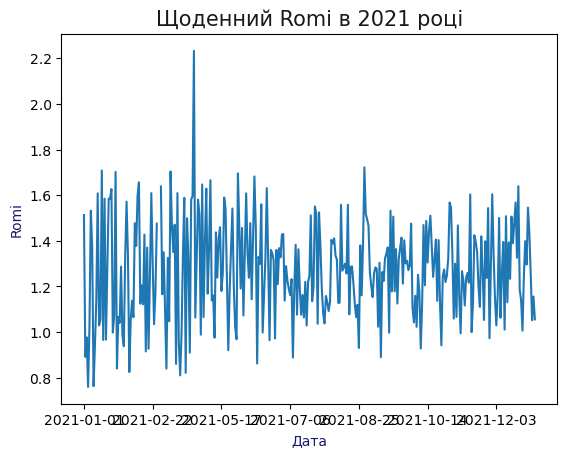

In [3]:
df_d['romi'] = df_d['total_value'] / df_d['total_spend']
df_d.loc['2021-01-01':'2021-12-31'].plot(y='romi')
plt.title('Щоденний Romi в 2021 році',size = 15, color = 'Black', alpha = 0.9)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Romi',color='midnightblue')
plt.legend().remove()
plt.show()

2 

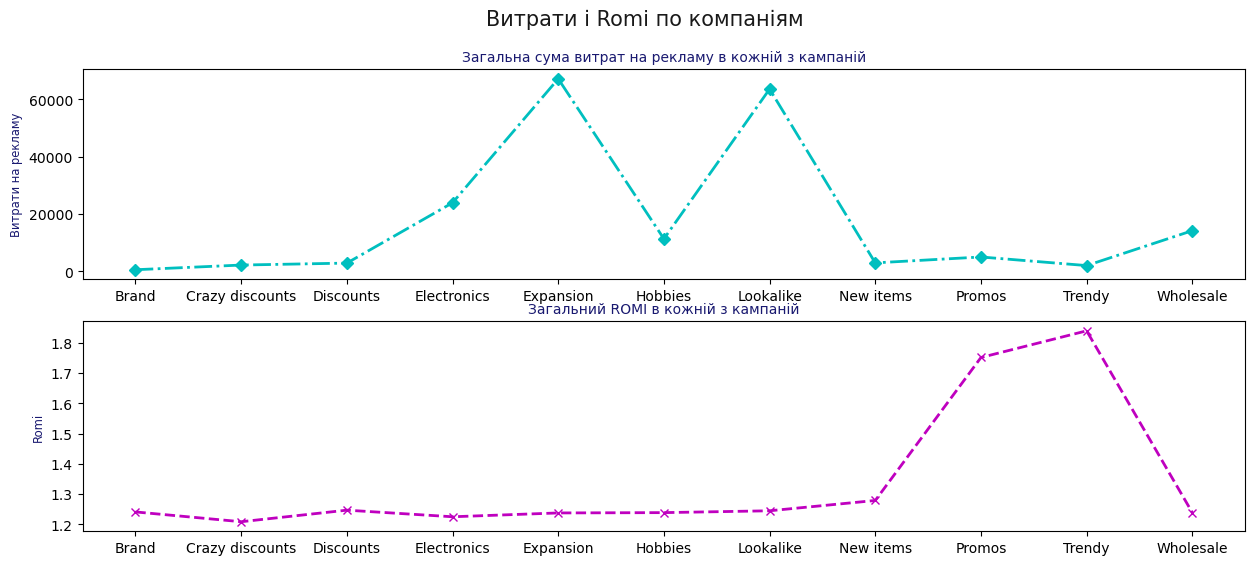

In [4]:
t = df.groupby('campaign_name')['total_spend'].sum()
r = df.groupby('campaign_name')['romi'].mean()
fig, axs = plt.subplots(2, 1, figsize=(15, 6))

axs[0].plot(t, label='Витрати', linestyle="-.", color="c",linewidth=2, marker="D")
axs[1].plot(r, label='Romi', linestyle="--", color="m",linewidth=2, marker="x")

axs[0].set_title('Загальна сума витрат на рекламу в кожній з кампаній', fontsize=10, color='midnightblue')
axs[1].set_title('Загальний ROMI в кожній з кампаній', fontsize=10, color='midnightblue')

axs[1].set_ylabel('Romi', fontsize='small', color='midnightblue')
axs[0].set_ylabel('Витрати на рекламу', fontsize='small', color='midnightblue')

fig.suptitle('Витрати і Romi по компаніям', fontsize=15,color = 'Black', alpha = 0.9)

plt.show()

Text(0.5, 1.0, 'Розкид щоденного ROMI в кожній кампаній')

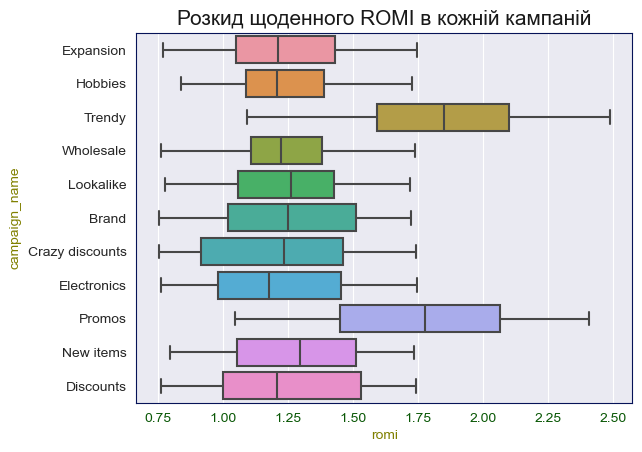

In [5]:
import seaborn as sns
sns.set_style("darkgrid",  {'axes.labelcolor':"(0.5,0.5,0)", 'axes.edgecolor':'#061358',
'xtick.color':'#0A5806'})
sns.boxplot(data=df, x="romi", y="campaign_name")
plt.title('Розкид щоденного ROMI в кожній кампаній',size = 15, color = 'Black', alpha = 0.9)


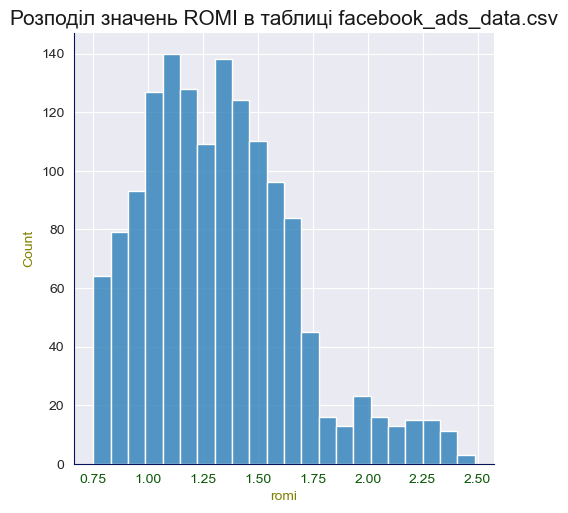

In [20]:
fig = sns.displot(data=df, x="romi")
fig.tight_layout()
plt.title('Розподіл значень ROMI в таблиці facebook_ads_data.csv',size = 15, color = 'Black', alpha = 0.9)
plt.show()

Показники,які мають найвищу кореляцію:total_spend  total_value    0.97889
dtype: float64
Показники,які мають найнижчу кореляцію:cpc  ctr   -0.210719
dtype: float64
З чим корелює "total_value"?


total_spend    0.97889
Name: total_value, dtype: float64

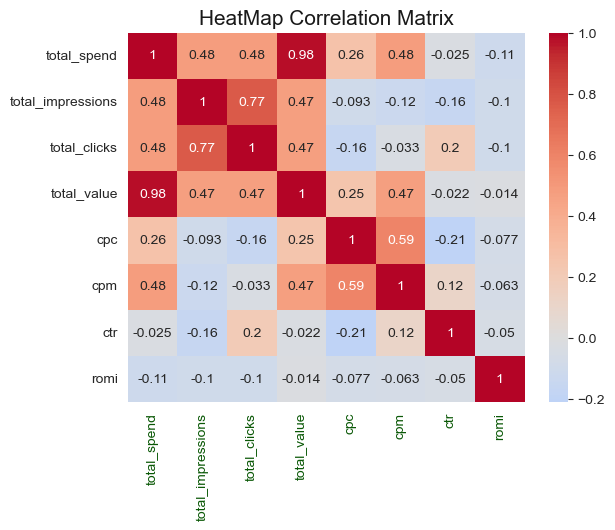

In [39]:
import numpy as np

df_bez_dt = df[['total_spend','total_impressions', 'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi']]
sns.heatmap(df_bez_dt.corr(), xticklabels=df_bez_dt.corr().columns, yticklabels=df_bez_dt.corr().columns, cmap='coolwarm', center=0, annot=True, linecolor='white',fmt='.2g')
plt.title('HeatMap Correlation Matrix', size = 15, color = 'Black', alpha = 0.9)

corr_matrix = df.corr(numeric_only=True)
np.fill_diagonal(corr_matrix.values, np.nan)
print('Показники,які мають найвищу кореляцію:'+str(corr_matrix.stack().nlargest(1)))
print('Показники,які мають найнижчу кореляцію:'+str(corr_matrix.stack().nsmallest(1)))

print('З чим корелює "total_value"?')
df.corr(numeric_only=True)['total_value'][:-1].head(1)

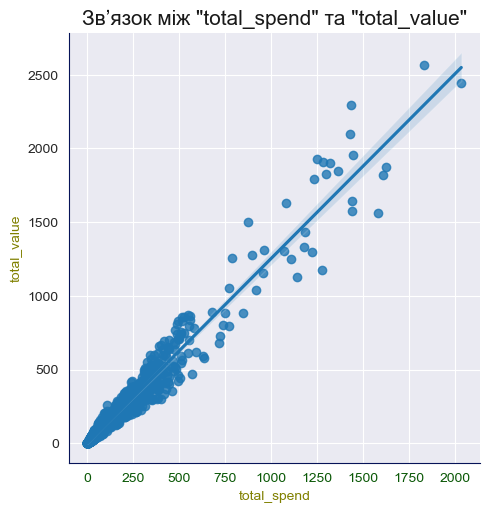

In [21]:
fig = sns.lmplot(x="total_spend", y="total_value", hue=None, col=None, data=df)
fig.tight_layout()
plt.title('Звʼязок між "total_spend" та "total_value"',size = 15, color = 'Black', alpha = 0.9)
plt.show()